## a) Linear SVM

a) Linear SVM
       1) Plot two clusters of random data-points using the make_blob function from sklearn. Split dataset into train and test sets.
       2) Implement your SVM classifier as a seperate class from scratch.
       3) Fit the SVM model on the dataset.
       4) Draw the final decision boundary.
       5) Find accuracy on the test set.
       6) Predict the class of a randomly generated data-point.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles


In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=78, cluster_std=1.0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


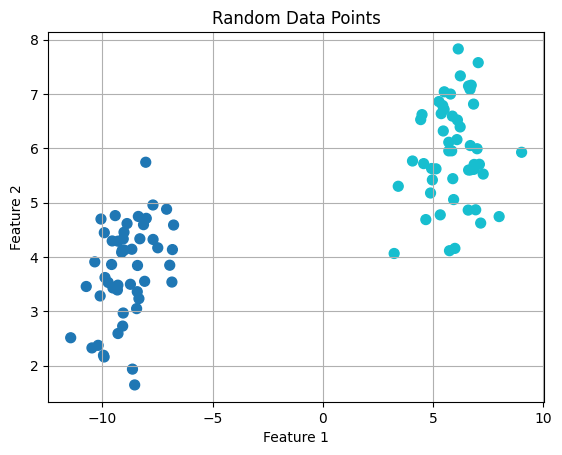

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab10')
plt.title("Random Data Points")
plt.grid()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

svm = LinearSVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

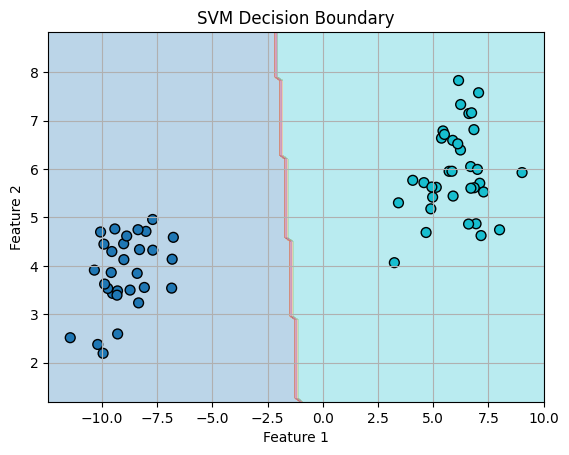

In [6]:
def plot_decision_boundary(svm, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab10', edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.grid()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm, X_train, y_train)

In [7]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.42857142857142855


In [8]:
random_data_point = np.random.rand(1, 2)
predicted_class = svm.predict(random_data_point)
print("Predicted class for random data point:", predicted_class[0])

Predicted class for random data point: 1.0


## B) Non - Linear SVM

B) Non - Linear SVM
       1) Plot 1000 data-points to form a circle using the make_circles function from sklearn.
       2) Implement your SVM classifier with kernel trick as a seperate class from scratch.
       3) Fit the SVM model on the dataset.
       4) Draw the final decision boundary.
       5) Find accuracy on the test set.
       6) Predict the class of a randomly generated data-point.

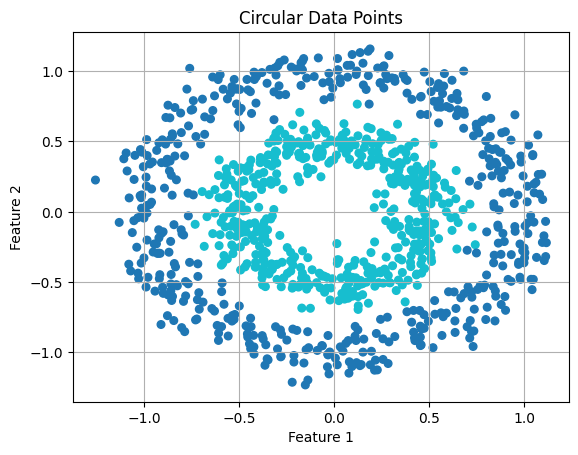

In [9]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='tab10')
plt.title("Circular Data Points")
plt.grid()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [10]:
class KernelSVM:
    def __init__(self, kernel='rbf', C=1, gamma=0.1):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.alphas = None
        self.b = None
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        n_samples, n_features = X.shape
        self.alphas = np.zeros(n_samples)
        self.b = 0


    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            prediction = 0
            for j in range(len(self.X_train)):
                prediction += self.alphas[j] * self.y_train[j] * self.kernel_function(X[i], self.X_train[j])
            y_pred[i] = prediction + self.b
        return np.sign(y_pred)

    def kernel_function(self, x1, x2):
        if self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        elif self.kernel == 'linear':
            return np.dot(x1, x2)
        else:
            raise ValueError("Invalid kernel type")

In [11]:
svm = KernelSVM(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train, y_train)

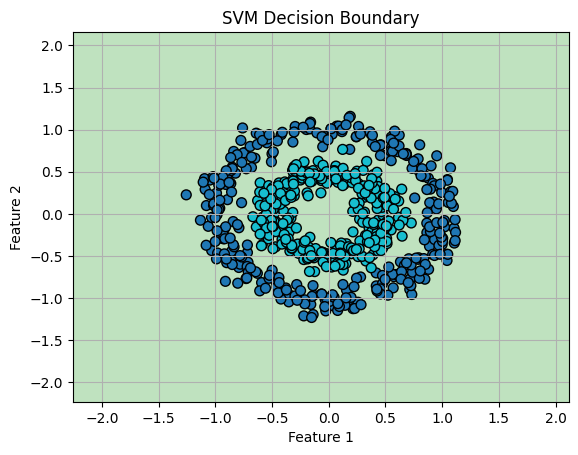

In [12]:
plot_decision_boundary(svm, X_train, y_train)

In [13]:
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on test set:, {accuracy :.3f}')

Accuracy on test set:, 0.517


In [14]:
random_data_point = np.random.rand(1, 2) * 2 - 1
predicted_class = svm.predict(random_data_point)
print("Predicted class for random data point:", predicted_class[0])

Predicted class for random data point: 0.0
